In [37]:
import yfinance as yfin

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf

from datetime import date, datetime

In [38]:
us_daily = pd.read_csv('./Wheat Futures US Daily (2000-24).csv',index_col=0)
us_weekly = pd.read_csv('./Wheat Futures US Weekly (2000-24).csv',index_col=0)
us_monthly = pd.read_csv('./Wheat Futures US Monthly (2000-24).csv',index_col=0)

In [39]:
us_daily

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-09-21 00:00:00-04:00,296.00,296.00,292.00,293.75,4842,0.0,0.0
2000-09-22 00:00:00-04:00,293.50,297.00,293.25,295.50,3945,0.0,0.0
2000-09-25 00:00:00-04:00,297.50,300.00,297.00,299.50,5073,0.0,0.0
2000-09-26 00:00:00-04:00,301.00,303.50,299.75,302.00,9180,0.0,0.0
2000-09-27 00:00:00-04:00,301.50,308.00,301.00,307.75,11145,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-12 00:00:00-04:00,552.75,558.75,540.00,548.25,54543,0.0,0.0
2024-08-13 00:00:00-04:00,551.50,552.00,541.00,547.75,35884,0.0,0.0
2024-08-14 00:00:00-04:00,547.00,552.00,542.00,546.25,27390,0.0,0.0


In [40]:
us_daily.drop(columns=['Dividends','Stock Splits'], inplace = True)
us_weekly.drop(columns=['Dividends','Stock Splits'], inplace = True)
us_monthly.drop(columns=['Dividends','Stock Splits'], inplace = True)

In [41]:
dly_chng = [0]*len(us_daily.Close.values)
weekly_chng = [0]*len(us_weekly.Close.values)
monthly_chng = [0]*len(us_monthly.Close.values)

for i in range(1, len(us_daily.Close.values)):
    dly_chng[i] = round((us_daily.Close.values[i] - us_daily.Close.values[i-1])/us_daily.Close.values[i-1] * 100, 2)

for i in range(1, len(us_weekly.Close.values)):
    weekly_chng[i] = round((us_weekly.Close.values[i] - us_weekly.Close.values[i-1])/us_weekly.Close.values[i-1] * 100, 2)

for i in range(1, len(us_monthly.Close.values)):
    monthly_chng[i] = round((us_monthly.Close.values[i] - us_monthly.Close.values[i-1])/us_monthly.Close.values[i-1] * 100, 2)

In [6]:
# dly_ret = [0]*len(us_daily.Close.values)
# weekly_ret = [0]*len(us_weekly.Close.values)
# monthly_ret = [0]*len(us_monthly.Close.values)

# for i in range(1, len(us_daily.Close.values)):
#     dly_ret[i] = round((us_daily.Close.values[i] - us_daily.Close.values[0])/us_daily.Close.values[0] * 100, 2)

# for i in range(1, len(us_weekly.Close.values)):
#     weekly_ret[i] = round((us_weekly.Close.values[i] - us_weekly.Close.values[0])/us_weekly.Close.values[0] * 100, 2)

# for i in range(1, len(us_monthly.Close.values)):
#     monthly_ret[i] = round((us_monthly.Close.values[i] - us_monthly.Close.values[0])/us_monthly.Close.values[0] * 100, 2)


In [50]:
dly_diff = [0]*len(us_daily.Close.values)
weekly_diff = [0]*len(us_weekly.Close.values)
monthly_diff = [0]*len(us_monthly.Close.values)

for i in range(1, len(us_daily.Close.values)):
    dly_diff[i] = round((us_daily.Close.values[i] - us_daily.Close.values[i-1]), 2)

for i in range(1, len(us_weekly.Close.values)):
    weekly_diff[i] = round((us_weekly.Close.values[i] - us_weekly.Close.values[i-1]), 2)

for i in range(1, len(us_monthly.Close.values)):
    monthly_diff[i] = round((us_monthly.Close.values[i] - us_monthly.Close.values[i-1]), 2)

In [68]:
us_weekly

,Open,High,Low,Close,Volume,Weekly Change (%),Weekly Change
Date,,,,,,,
2000-09-18 00:00:00-04:00,296.00,297.00,292.00,295.50,8787,0.00,0.00
2000-09-25 00:00:00-04:00,297.50,320.00,297.00,320.00,46542,8.29,24.50
2000-10-02 00:00:00-04:00,325.00,325.00,313.00,318.50,29898,-0.47,-1.50
2000-10-09 00:00:00-04:00,317.50,331.50,316.50,320.00,39789,0.47,1.50
2000-10-16 00:00:00-04:00,319.50,324.50,308.25,309.00,36577,-3.44,-11.00
...,...,...,...,...,...,...,...
2024-07-15 00:00:00-04:00,569.00,579.50,545.75,570.00,130663,-5.63,-34.00
2024-07-22 00:00:00-04:00,570.25,578.25,544.50,545.50,114891,-4.30,-24.50
2024-07-29 00:00:00-04:00,546.00,562.75,535.50,559.75,2302464,2.61,14.25


In [52]:
us_daily['Daily Change (%)'] = dly_chng
us_weekly['Weekly Change (%)'] = weekly_chng
us_monthly['Monthly Change (%)'] = monthly_chng

us_daily['Daily Change'] = dly_diff
us_weekly['Weekly Change'] = weekly_diff
us_monthly['Monthly Change'] = monthly_diff

# us_daily['Returns (%)'] = dly_ret
# us_weekly['Returns (%)'] = weekly_ret
# us_monthly['Returns (%)'] = monthly_ret

In [69]:
us_daily['Daily Change (%) Squared'] = np.square(us_daily['Daily Change (%)'].values)
us_weekly['Weekly Change (%) Squared'] = np.square(us_weekly['Weekly Change (%)'].values)
us_monthly['Monthly Change (%) Squared'] = np.square(us_monthly['Monthly Change (%)'].values)

us_daily['Daily Change Squared'] = np.square(us_daily['Daily Change'].values)
us_weekly['Weekly Change Squared'] = np.square(us_weekly['Weekly Change'].values)
us_monthly['Monthly Change Squared'] = np.square(us_monthly['Monthly Change'].values)

In [70]:
us_daily.head()

,Open,High,Low,Close,Volume,Daily Change (%),Daily Change,Daily Change (%) Squared,Daily Change Squared
Date,,,,,,,,,
2000-09-21 00:00:00-04:00,296.0,296.0,292.00,293.75,4842,0.00,0.00,0.0000,0.0000
2000-09-22 00:00:00-04:00,293.5,297.0,293.25,295.50,3945,0.60,1.75,0.3600,3.0625
2000-09-25 00:00:00-04:00,297.5,300.0,297.00,299.50,5073,1.35,4.00,1.8225,16.0000
2000-09-26 00:00:00-04:00,301.0,303.5,299.75,302.00,9180,0.83,2.50,0.6889,6.2500
2000-09-27 00:00:00-04:00,301.5,308.0,301.00,307.75,11145,1.90,5.75,3.6100,33.0625


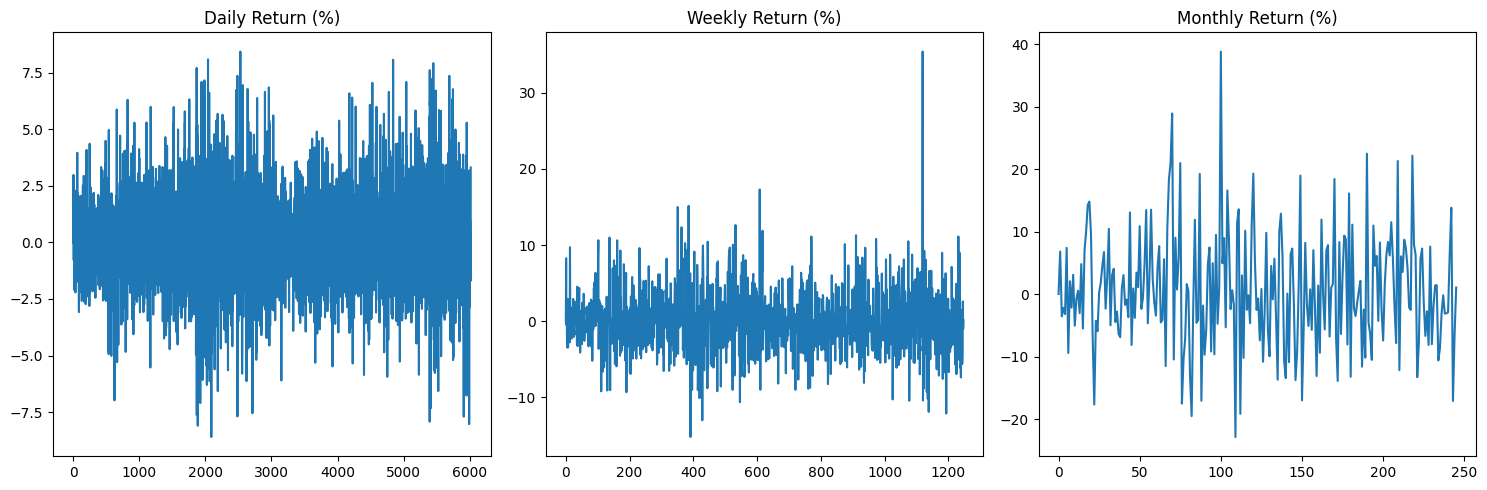

In [72]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot in the first subplot
axs[0].plot(us_daily['Daily Change (%)'].values)
axs[0].set_title('Daily Return (%)')

# Plot in the second subplot
axs[1].plot(us_weekly['Weekly Change (%)'].values)
axs[1].set_title('Weekly Return (%)')

# Plot in the third subplot
axs[2].plot(us_monthly['Monthly Change (%)'].values)
axs[2].set_title('Monthly Return (%)')

# Display the plots
plt.tight_layout()
plt.show()

C:\Users\yadav\AppData\Local\Temp\ipykernel_14572\2341200357.py:4: RuntimeWarning: divide by zero encountered in log
  axs[0].plot(np.log(us_daily['Daily Change (%)'].values))
C:\Users\yadav\AppData\Local\Temp\ipykernel_14572\2341200357.py:4: RuntimeWarning: invalid value encountered in log
  axs[0].plot(np.log(us_daily['Daily Change (%)'].values))
C:\Users\yadav\AppData\Local\Temp\ipykernel_14572\2341200357.py:8: RuntimeWarning: divide by zero encountered in log
  axs[1].plot(np.log(us_weekly['Weekly Change (%)'].values))
C:\Users\yadav\AppData\Local\Temp\ipykernel_14572\2341200357.py:8: RuntimeWarning: invalid value encountered in log
  axs[1].plot(np.log(us_weekly['Weekly Change (%)'].values))
C:\Users\yadav\AppData\Local\Temp\ipykernel_14572\2341200357.py:12: RuntimeWarning: divide by zero encountered in log
  axs[2].plot(np.log(us_monthly['Monthly Change (%)'].values))
C:\Users\yadav\AppData\Local\Temp\ipykernel_14572\2341200357.py:12: RuntimeWarning: invalid value encountered in 

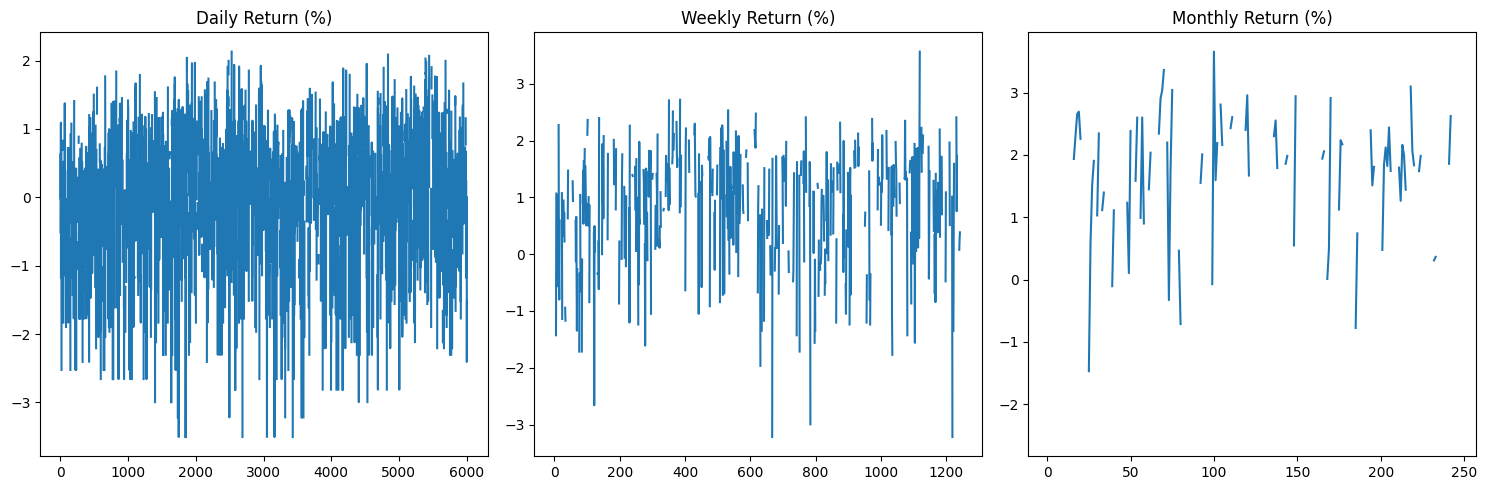

In [83]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot in the first subplot
axs[0].plot(np.log(us_daily['Daily Change (%)'].values))
axs[0].set_title('Daily Return (%)')

# Plot in the second subplot
axs[1].plot(np.log(us_weekly['Weekly Change (%)'].values))
axs[1].set_title('Weekly Return (%)')

# Plot in the third subplot
axs[2].plot(np.log(us_monthly['Monthly Change (%)'].values))
axs[2].set_title('Monthly Return (%)')

# Display the plots
plt.tight_layout()
plt.show()

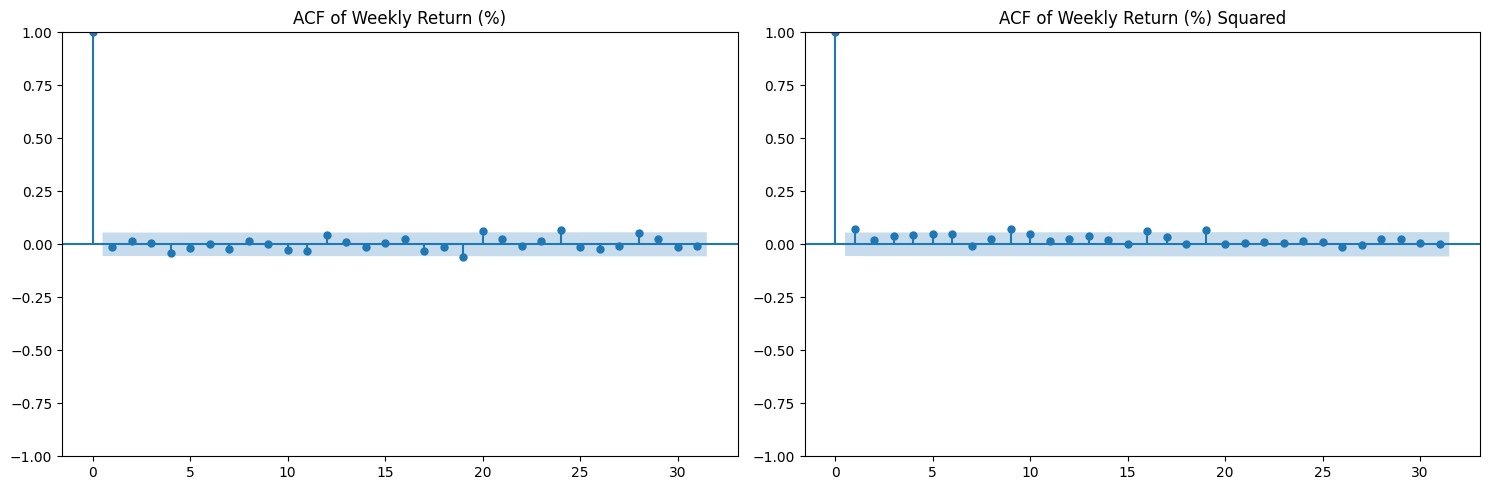

In [82]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot in the first subplot
plot_acf(us_weekly[['Weekly Change (%)']], ax=axs[0], title='ACF of Weekly Return (%)')
# axs[0].set_title('Weekly Return (%)')

# Plot in the second subplot
plot_acf(us_weekly[['Weekly Change (%) Squared']], ax=axs[1], title='ACF of Weekly Return (%) Squared')
# axs[1].set_title('Weekly Return (%) Squared')
# Display the plots
plt.tight_layout()
plt.show()

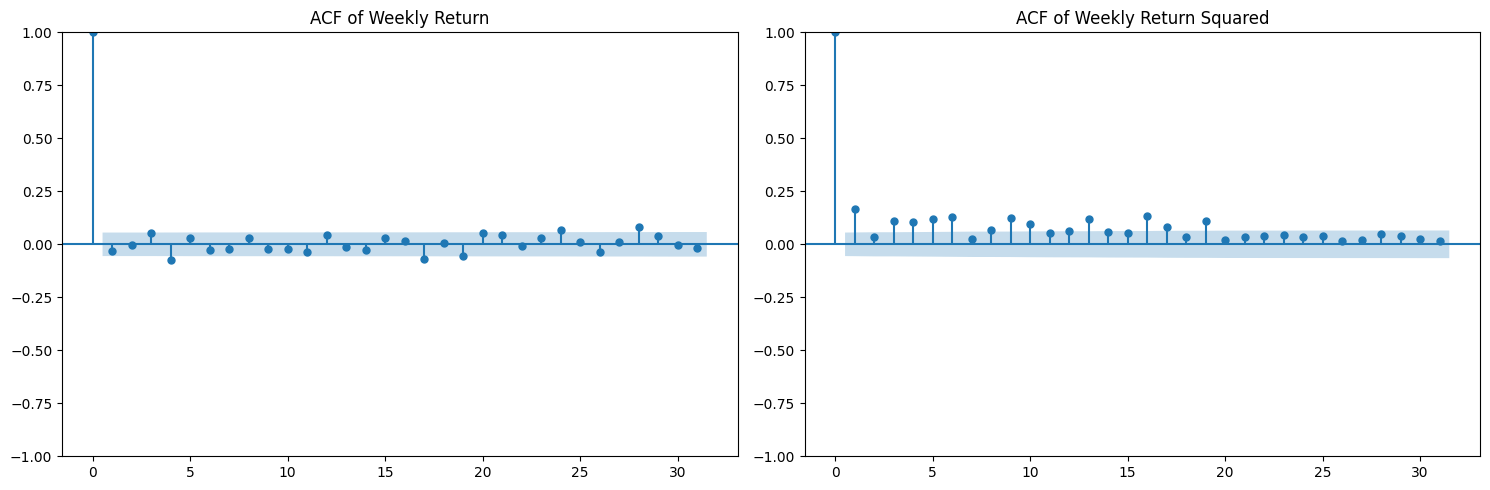

In [81]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot in the first subplot
plot_acf(us_weekly[['Weekly Change']], ax=axs[0], title='ACF of Weekly Return')
# axs[0].set_title('Weekly Return (%)')

# Plot in the second subplot
plot_acf(us_weekly[['Weekly Change Squared']], ax=axs[1], title='ACF of Weekly Return Squared')
# axs[1].set_title('Weekly Return (%) Squared')
# Display the plots
plt.tight_layout()
plt.show()